In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import random
import cv2
import xml.etree.ElementTree as ET
%matplotlib inline

Error loading image: G:/My Drive/Numberplate\118.xml
Error loading image: G:/My Drive/Numberplate\167.xml


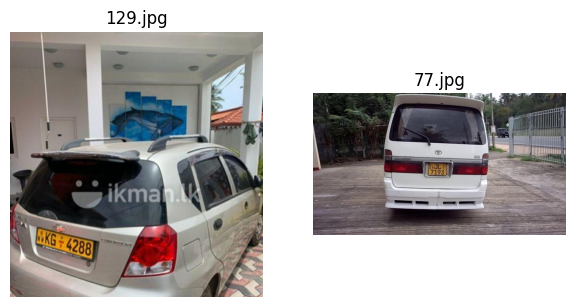

In [16]:
image_folder_path = 'G:/My Drive/Numberplate'

image_files = [f for f in os.listdir(image_folder_path) if os.path.isfile(os.path.join(image_folder_path, f))]

if not image_files:
    print(f"No images found in {image_folder_path}")
else:
    # Display some random images
    num_images_to_display = min(4, len(image_files))  # Display up to 5 images, or all if fewer are present
    random_image_indices = random.sample(range(len(image_files)), num_images_to_display)

    plt.figure(figsize=(15, 5)) # Adjust figure size as needed

    for i, index in enumerate(random_image_indices):
        image_path = os.path.join(image_folder_path, image_files[index])
        img = cv2.imread(image_path)

        if img is not None:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            plt.subplot(1, num_images_to_display, i + 1)
            plt.imshow(img)
            plt.title(image_files[index])
            plt.axis('off')
        else:
            print(f"Error loading image: {image_path}")

    plt.show()


In [17]:
def parse_annotations(annotations_path, images_path):
    annotations = []
    for file in os.listdir(annotations_path):
        if file.endswith(".xml"):
            xml_path = os.path.join(annotations_path, file)
            try:
                tree = ET.parse(xml_path)
                root = tree.getroot()

                # Get image file name
                image_file = root.find('filename').text
                image_path = os.path.join(images_path, image_file)

                # Get bounding boxes
                boxes = []
                for obj in root.findall('object'):
                    bbox = obj.find('bndbox')
                    xmin = int(bbox.find('xmin').text)
                    ymin = int(bbox.find('ymin').text)
                    xmax = int(bbox.find('xmax').text)
                    ymax = int(bbox.find('ymax').text)
                    boxes.append((xmin, ymin, xmax, ymax))

                annotations.append({'image': image_path, 'boxes': boxes})
            except Exception as e:
                print(f"Error parsing {xml_path}: {e}")
    return annotations
